In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

def function(y, t, Ppr):
    term1 = -0.06125 * Ppr * t * math.exp(-1.2 * pow(1 - t, 2))
    term2 = (y + y*y + y*y*y - y*y*y*y) / (pow(1 - y, 3))
    term3 = -(14.76 * t - 9.76 * t*t + 4.58 * t*t*t) * y * y
    term4 = (90.7 * t - 242.2 * t * t + 42.2 * t * t * t) * pow(y, 2.18 + 2.82 * t)
    Fy = term1 + term2 + term3 + term4
    return Fy

def derivative(y, t):
    term1 = (1 + 4 * y + 4 * y * y - 4 * y * y * y + y * y * y * y) / (pow(1 - y, 4))
    term2 = -2 * (14.76 * t - 9.76 * t * t + 4.58 * t * t * t) * y
    term3 = (2.18 + 2.82 * t) * (90.7 * t - 242.2 * t * t + 42.2 * t * t * t) * pow(y, 1.18 + 2.82 * t)
    dFdy = term1 + term2 + term3
    return dFdy

def Zfactor(P, T):
    Data = pd.read_csv('composition CSV.csv')
    component = Data['Component'].to_numpy()
    MW = Data['Molecular weight'].to_numpy()
    Pc = Data['Critical Pressure Psia'].to_numpy()
    Tc = Data['Critiacal temp'].to_numpy()
    Yi = Data['typical composition'].to_numpy()

    Ppc = np.dot(Yi, Pc)
    Tpc = np.dot(Yi, Tc)
    Ppr = P / Ppc
    Tpr = T / Tpc
    t = 1 / Tpr

    xn = 0.0001
    xnp1 = xn - (function(xn, t, Ppr)) / derivative(xn, t)
    iteration = 0
    max_iterations = 100  # limit to prevent infinite loop

    while abs(xnp1 - xn) > 1e-6 and iteration < max_iterations:
        xn = xnp1
        xnp1 = xn - (function(xn, t, Ppr)) / derivative(xn, t)
        iteration += 1
        print(f"Iteration {iteration}: xnp1 = {xnp1}, xn = {xn}, diff = {abs(xnp1 - xn)}")

    if iteration == max_iterations:
        print(f"Warning: Newton-Raphson did not converge after {max_iterations} iterations.")

    Z = (0.06125 * Ppr * t * math.exp(-1.2 * pow(1 - t, 2))) / xnp1
    return Z

def FVF(P, T, Z):
    Bg = 0.005035 * P / (Z * T)
    return Bg

production_data = pd.read_csv('production data.csv')
P = production_data['Pressure(psi) '].to_numpy()
Gp = production_data['Production(MMSCF)'].to_numpy()
T = 640.0  # input temperature

Zlist = []
m = P.shape[0]
print(m)
for i in range(m):
    Z = Zfactor(P[i], T)
    Zlist.append(Z)
    print(i)

Zarr = np.array(Zlist)
print(Zarr)
print("Yes")

27
Iteration 1: xnp1 = 0.1150023720527292, xn = 0.09930982276751504, diff = 0.015692549285214158
Iteration 2: xnp1 = 0.11481056929340647, xn = 0.1150023720527292, diff = 0.0001918027593227345
Iteration 3: xnp1 = 0.11481052526519703, xn = 0.11481056929340647, diff = 4.4028209439384014e-08
0
Iteration 1: xnp1 = 0.11050341849189711, xn = 0.09555241757908059, diff = 0.014951000912816523
Iteration 2: xnp1 = 0.11036212831385316, xn = 0.11050341849189711, diff = 0.00014129017804395683
Iteration 3: xnp1 = 0.11036210791905816, xn = 0.11036212831385316, diff = 2.0394794991718257e-08
1
Iteration 1: xnp1 = 0.11050341849189711, xn = 0.09555241757908059, diff = 0.014951000912816523
Iteration 2: xnp1 = 0.11036212831385316, xn = 0.11050341849189711, diff = 0.00014129017804395683
Iteration 3: xnp1 = 0.11036210791905816, xn = 0.11036212831385316, diff = 2.0394794991718257e-08
2
Iteration 1: xnp1 = 0.11603001047103365, xn = 0.10017262969089515, diff = 0.0158573807801385
Iteration 2: xnp1 = 0.115825684304

In [3]:
print(P.shape)

(27,)


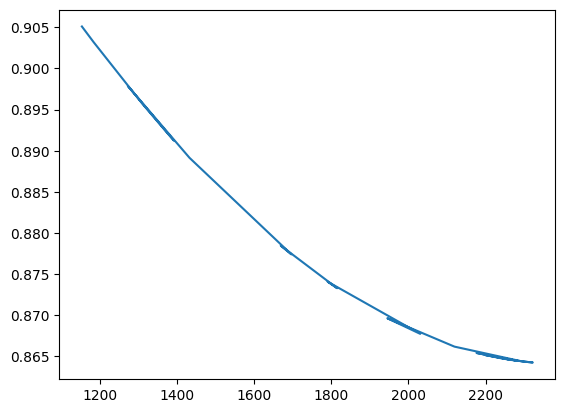

In [4]:
plt.plot(P,Zarr)
plt.show()

In [5]:
Bglist=[]
for i in range(m):
    bg = FVF(P[i],T,Zarr[i])
    Bglist.append(bg)

Bg = np.array(Bglist)
print(Bg)
    

[0.02058264 0.01978515 0.01978515 0.02076462 0.02000002 0.02037974
 0.02063296 0.02103902 0.02110036 0.02113881 0.0209037  0.02087743
 0.01924823 0.01759842 0.01840924 0.01611607 0.01635264 0.01494758
 0.01510015 0.01521205 0.01267791 0.01115232 0.01229251 0.01212819
 0.01151281 0.01031215 0.01002913]


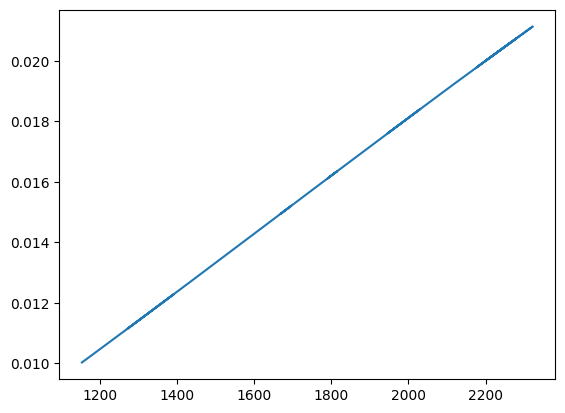

In [6]:
plt.plot(P,Bg)
plt.show()

In [7]:
pzlist = []
GpGlist = []
Pi_by_Zi = P[0]/Zarr[0]
print(Pi_by_Zi)

for i in range(m):
    p_z = P[i]/Zarr[i]
    gpg = 1- p_z/Pi_by_Zi
    GpGlist.append(gpg)
    pzlist.append(p_z)

P_by_Z = np.array(pzlist)
Gp_by_G = np.array(GpGlist)
print(P_by_Z)
print(Gp_by_G)

2616.2636989752978
[2616.26369898 2514.89465817 2514.89465817 2639.39562546 2542.20669518
 2590.47373693 2622.65990047 2674.27503834 2682.07138365 2686.95895041
 2657.07379134 2653.73549255 2446.64674487 2236.93950025 2340.00276025
 2048.51789347 2078.58754204 1899.99046521 1919.38368734 1933.6069566
 1611.49257891 1417.57421816 1562.50401231 1541.61731867 1463.39621257
 1310.77968168 1274.80440508]
[ 0.          0.03874573  0.03874573 -0.00884159  0.0283064   0.00985755
 -0.00244478 -0.02217335 -0.02515331 -0.02702145 -0.01559862 -0.01432264
  0.06483175  0.14498699  0.10559369  0.21700634  0.20551298  0.27377716
  0.26636459  0.26092811  0.38404811  0.45816845  0.40277274  0.41075614
  0.44065416  0.49898793  0.51273856]


In [8]:
calculated_data = {
    "pressure(psi)":P,
    "production": Gp,
    "Zfactor" : Z,
    "Bg" : Bg,
    "pbyz" : P_by_Z,
    "GpbyG": Gp_by_G
    
}

In [9]:
df = pd.DataFrame(calculated_data)
print(df)

    pressure(psi)  production   Zfactor        Bg         pbyz     GpbyG
0     2262.040730    0.000000  0.905106  0.020583  2616.263699  0.000000
1     2176.456027    0.000000  0.905106  0.019785  2514.894658  0.038746
2     2176.456027    0.000000  0.905106  0.019785  2514.894658  0.038746
3     2281.693408    0.038076  0.905106  0.020765  2639.395625 -0.008842
4     2199.433554    6.273443  0.905106  0.020000  2542.206695  0.028306
5     2240.185709    6.814967  0.905106  0.020380  2590.473737  0.009858
6     2267.470064    7.526165  0.905106  0.020633  2622.659900 -0.002445
7     2311.420196    7.526165  0.905106  0.021039  2674.275038 -0.022173
8     2318.080703    7.526165  0.905106  0.021100  2682.071384 -0.025153
9     2322.259237   11.441618  0.905106  0.021139  2686.958950 -0.027021
10    2296.745688   11.441618  0.905106  0.020904  2657.073791 -0.015599
11    2293.901019   22.203017  0.905106  0.020877  2653.735493 -0.014323
12    2119.278186   85.159666  0.905106  0.019248  

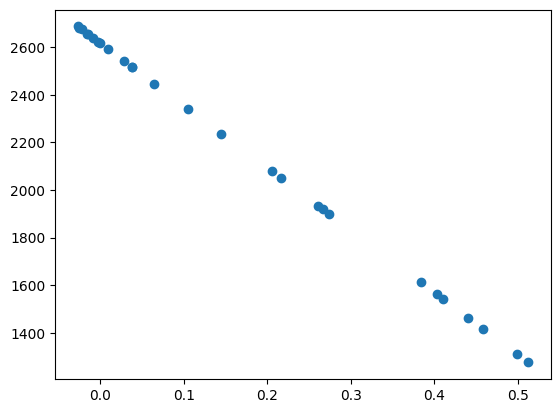

In [10]:
plt.plot(Gp_by_G,P_by_Z,'o')
plt.show()


Y-intercept: 2642.935534625821
X-intercept: 794.5009042136928


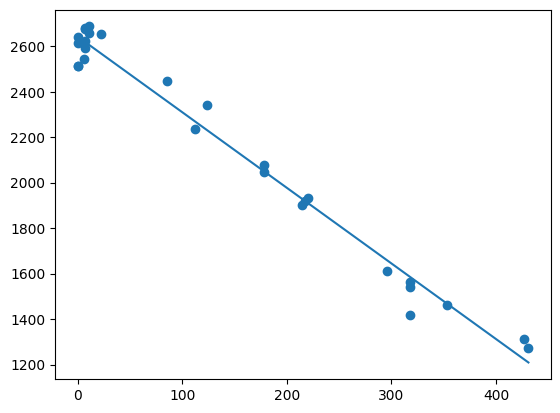

In [11]:
# Assuming Gp and P_by_Z are already defined
plt.scatter(Gp, P_by_Z)
r = np.polyfit(Gp, P_by_Z, 1)
s = np.poly1d(r)
plt.plot(Gp, s(Gp))

# Y-intercept (b)
y_intercept = r[1]
print(f"Y-intercept: {y_intercept}")

# X-intercept (-b/m)
x_intercept = -r[1] / r[0]
print(f"X-intercept: {x_intercept}")

plt.show()

In [12]:
print("i")

i


In [13]:
glist =[]
glist.append(0)

for i in range(m-1):
    g = (Gp[i+1]*Bg[i+1])/(Bg[0]-Bg[i+1])
    glist.append(g)

garr = np.array(glist)
print(garr)

[    0.             0.             0.            -4.34454207
   215.35287656   684.52962438 -3085.98332446  -346.95001723
  -306.73791175  -434.86878212  -744.94375181 -1572.40763327
  1228.38911186   661.10673523  1049.65084299   644.37537478
   690.39978829   570.13269002   598.51855623   623.54046417
   473.91791559   375.83772602   471.23856118   455.90280087
   448.04162935   428.78469863   409.571996  ]


In [15]:
# now considring water influx also
Ylist = [0,]
Xlist=[0,]

for i in range(m-1):
    y = (Gp[i+1]*Bg[i+1])/(Bg[0]-Bg[i+1])
    x = (P[0]-P[i+1])/(Bg[0]-Bg[i+1])
    Ylist.append(y)
    Xlist.append(x)


In [16]:
print(Ylist)
print(Xlist)

[0, 0.0, 0.0, -4.34454207257625, 215.35287655995856, 684.5296243785363, -3085.9833244615597, -346.95001723244417, -306.7379117470761, -434.86878212102323, -744.9437518116551, -1572.4076332690693, 1228.3891118647105, 661.1067352336268, 1049.650842991493, 644.3753747827677, 690.3997882851843, 570.1326900231921, 598.5185562331468, 623.54046417092, 473.9179155921777, 375.8377260211363, 471.23856118008587, 455.9028008729286, 448.04162934769846, 428.7846986264977, 409.57199600135584]
[0, 107317.68851172781, 107317.68851172781, 107991.71400033517, 107457.93150173173, 107716.20005306273, 107895.89500479467, 108196.6951598501, 108243.49469883405, 108273.01726259268, 108094.71094931578, 108075.12064413959, 106985.64698612156, 106125.58479000969, 106518.50775383988, 105551.29933690054, 105630.70774212318, 105225.60037653064, 105261.91491219304, 105289.72522922106, 104899.55060809759, 104899.46258496823, 104883.20626507784, 104879.61387042928, 104883.95903430055, 104972.36334261118, 105008.4149420

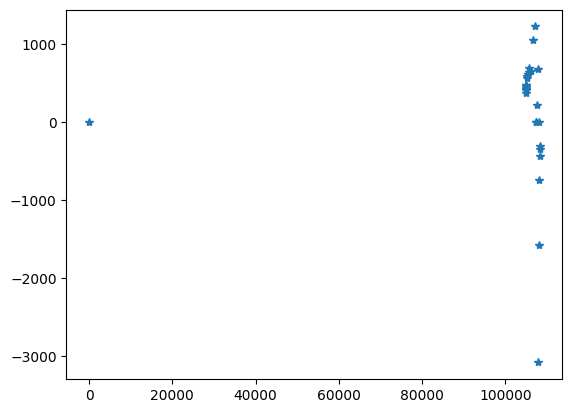

In [17]:
Y = np.array(Ylist)
X = np.array(Xlist)
plt.plot(X,Y,'*')
plt.show()